**Project Summary**

Performed time series forecasting of champagne sales utilizing ARIMA and SARIMA models. Stationarity was evaluated using the Dickey-Fuller test. SARIMA exhibited a lower RMSE of 328.88, compared to ARIMA's RMSE of 350.86.

# **Import and read data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
df=pd.read_csv("/content/perrin-freres-monthly-champagne-.csv")

In [ ]:
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [ ]:
df.index = pd.to_datetime(df['Month'],format='%Y-%m')
df.head()

,Month,Sales
Month,,
1964-01-01,1964-01,2815
1964-02-01,1964-02,2672
1964-03-01,1964-03,2755
1964-04-01,1964-04,2721
1964-05-01,1964-05,2946


In [ ]:
#Splitting the data into train and test
ts_train = df[df.index.year != 1972]['Sales']
ts_test = df[df.index.year == 1972]['Sales']

print('train examples: ', ts_train.shape[0])
print('test examples: ', ts_test.shape[0])

train examples:  96
test examples:  9


In [ ]:
ts_train.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

In [ ]:
ts_train.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01', '1965-11-01', '1965-12-01',
               '1966-01-01', '1966-02-01', '1966-03-01', '1966-04-01',
               '1966-05-01', '1966-06-01', '1966-07-01', '1966-08-01',
               '1966-09-01', '1966-10-01', '1966-11-01', '1966-12-01',
               '1967-01-01', '1967-02-01', '1967-03-01', '1967-04-01',
               '1967-05-01', '1967-06-01', '1967-07-01', '1967-08-01',
               '1967-09-01', '1967-10-01', '1967-11-01', '1967-12-01',
               '1968-01-01', '1968-02-01', '1968-03-01', '1968-04-01',
               '1968-05-01', '1968-06-01', '1968-07-01', '1968-08-01',
      

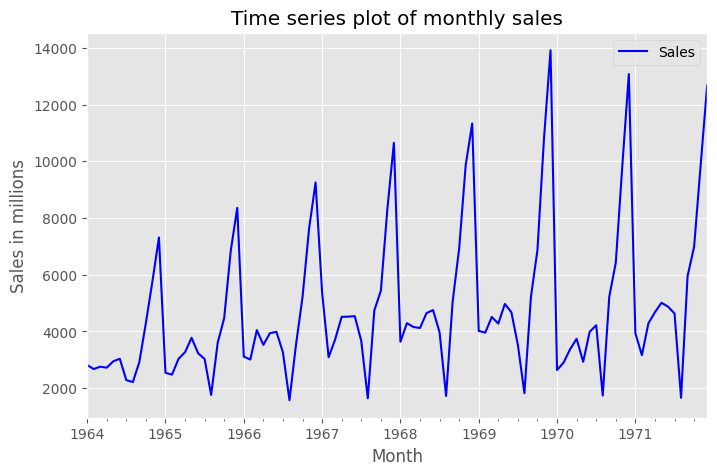

In [ ]:
#Plotting the time series
ts_train.plot(figsize=(8, 5), color= 'blue')
plt.legend()
plt.ylabel('Sales in millions')
plt.title('Time series plot of monthly sales')
plt.show()

# **Analyse the data**

In [ ]:
import statsmodels.api as sm

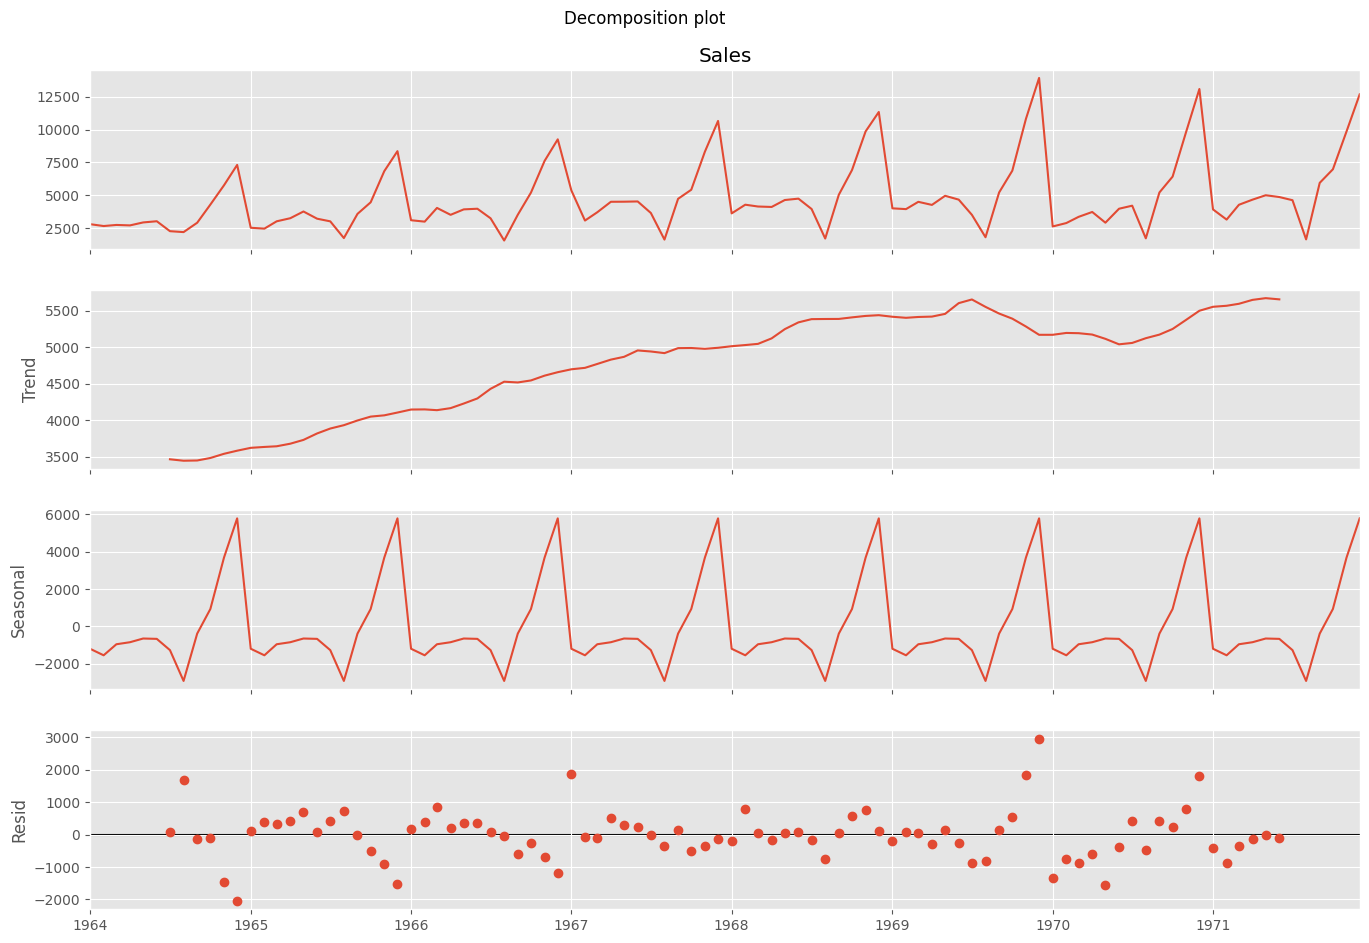

In [ ]:
# Decomposing the plot into trend, seasonality and residuals
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(ts_train, model='additive')

fig = decomposition.plot()
fig.set_size_inches(15,10)
fig.suptitle('Decomposition plot')
plt.show()

There is trend and seasonality as per the above visualization. To check the stationarity, two methods are used below. Those are rolling mean as well as Dicky Fuller hypothesis test.

In [ ]:
def make_plot(series,window, title = ''):
    rollmean = series.rolling(window=12).mean()
    rollstd = series.rolling(window =12).std()
    plt.figure(figsize = (8,5))
    series.plot()
    rollmean.plot(label = 'rolling mean')
    rollstd.plot(label = 'rolling std')
    plt.ylabel('Sales in millions')
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def dfuller(series):
    dftest = adfuller(series, autolag='AIC')
    values_names = ['Test Statistic','p-value','no. of lags Used','Number of Observations Used']
    for value_name,value in list(zip(values_names,dftest)):
        print(value_name,': ', value)
    print('critical values: ',dftest[4])

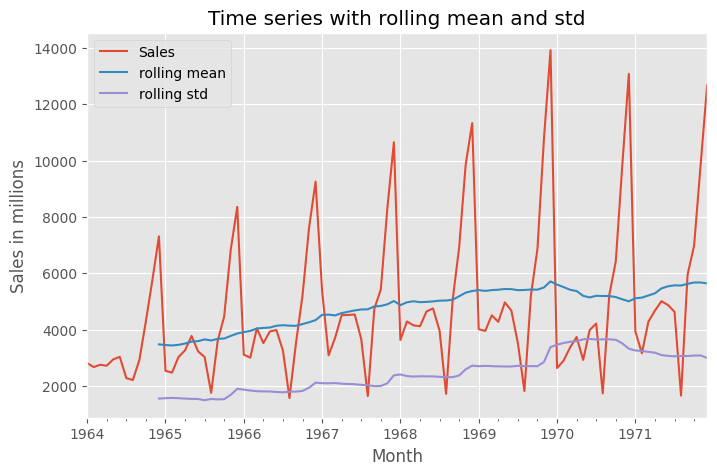

In [ ]:
make_plot(ts_train, 12, 'Time series with rolling mean and std')

The plot shows that the rolling mean as well as the standard deviation is not constant, this gives a hint of non-stationarity.

In [ ]:
dfuller(ts_train)

Test Statistic :  -1.6205567758335147
p-value :  0.4724374136239979
no. of lags Used :  11
Number of Observations Used :  84
critical values:  {'1%': -3.510711795769895, '5%': -2.8966159448223734, '10%': -2.5854823866213152}


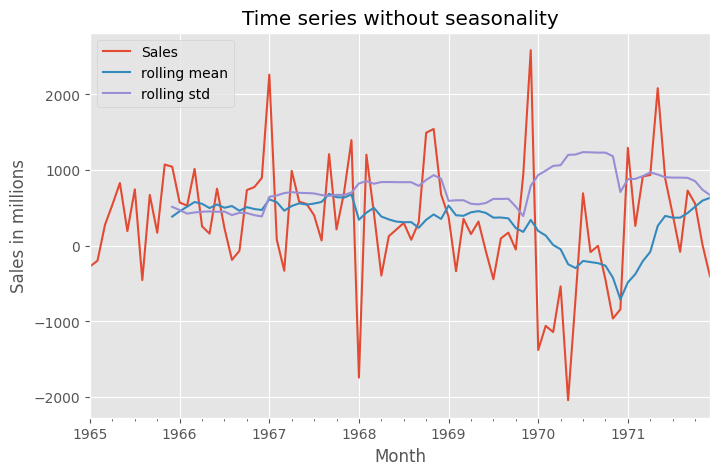

In [ ]:
# Since the series has seasonality, by shifting the series by 12 and subtracting it from original series we can remove the seasonality.
seasonal_diff_ts = ts_train - ts_train.shift(12)
seasonal_diff_ts.dropna(inplace  =True)
make_plot(seasonal_diff_ts,12, 'Time series without seasonality')


Visually it is evident that the stationay is removed

In [ ]:
# Verifying stationarity with Dicky Fuller test
dfuller(seasonal_diff_ts)

Test Statistic :  -7.218206477481622
p-value :  2.1453454714942473e-10
no. of lags Used :  0
Number of Observations Used :  83
critical values:  {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}


We can see that the time series is now stationary, as the test statistic is much less than the 1 percent critical value.

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
ts_acf = acf(seasonal_diff_ts,nlags=40)
ts_pacf = pacf(seasonal_diff_ts,nlags =40)

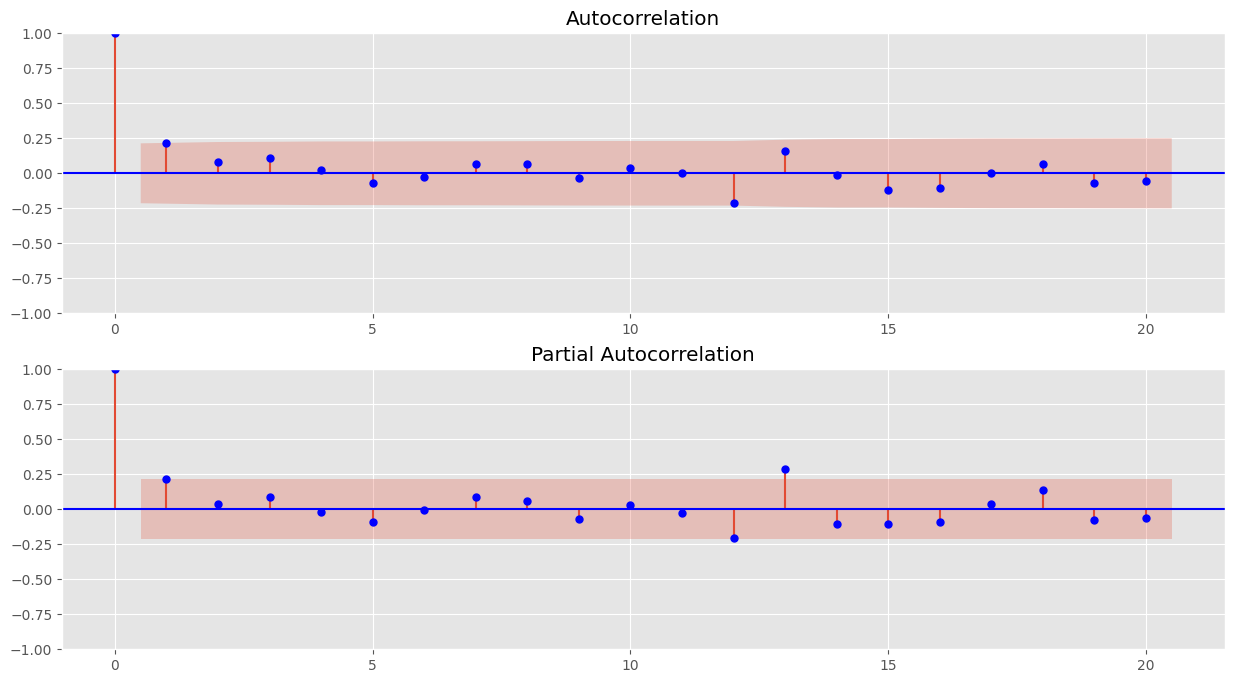

In [ ]:
plt.figure(figsize = (15,8))
plt.subplot(211)
plot_acf(seasonal_diff_ts, ax=plt.gca(), color ='blue')
plt.subplot(212)
plot_pacf(seasonal_diff_ts, ax=plt.gca(),  color ='blue')
plt.show()

In [ ]:
def inverse_seas_diff(original, value, interval):
    return value + original.iloc[-interval]

def make_seas_diff(original, interval):
    seasonal_diff_ts = original - original.shift(interval)
    seasonal_diff_ts.dropna(inplace  =True)
    return list(seasonal_diff_ts)


In [ ]:
#Building ARIMA model
from statsmodels.tsa.arima_model import ARIMA

The method we will use is feed forward validation. How this works is that we will build a model by iterating over every value in the test set. For every value in the test set-

1. We will take the train set and remove its seasonality.
2. Build a model using the non-stationary data.
3. Forecast the next value using the model.
4. Add the true value to the train set.
5. Add the predicted value to the predictions list.
6. Go to step 1.

At the end we will find the rmse, using the predictions and the test set.

In [ ]:
def rmse(order):

    train_list = list(ts_train)
    predictions = []
    for index,true_value in ts_test.iteritems():
        seasonal_diff_ts = make_seas_diff(pd.Series(train_list),12)
        model = ARIMA(seasonal_diff_ts, order=order)
        results_AR = model.fit(trend = 'nc',disp=0)
        pred = results_AR.forecast()[0][0]
        pred = inverse_seas_diff(pd.Series(train_list),pred,12)
        train_list.append(true_value)
        predictions.append(pred)

    return ('RMSE: ', mean_squared_error(list(ts_test), predictions) ** 0.5)


In [ ]:
# Trying all possible combination parameter for (p,d,q) and then computing RMSEs for each combination.
import itertools
p = range(0,5)
d = range(0,3)
q = range(0,5)
combinations = list(itertools.product(p,d,q))

for parameter in combinations:
    try:
        order = parameter
        print(order,':', rmse(order))
    except:
        continue


RMSE:  350.86169644046214


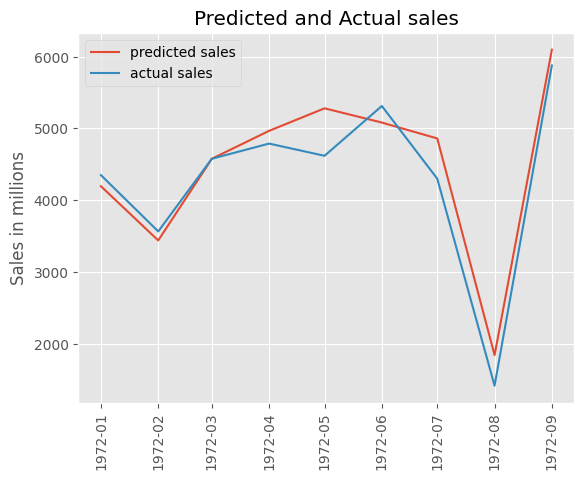

In [ ]:
import itertools
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


train_list = list(ts_train)
predictions = []
for index, true_value in ts_test.items():
    seasonal_diff_ts = make_seas_diff(pd.Series(train_list), 12)
    model = ARIMA(seasonal_diff_ts, order=(0, 1, 1))
    results_AR = model.fit()
    pred = results_AR.forecast()[0]
    pred = inverse_seas_diff(pd.Series(train_list), pred, 12)
    train_list.append(true_value)
    predictions.append(pred)

print('RMSE: ', mean_squared_error(list(ts_test), predictions) ** 0.5)

pred_series = pd.Series(predictions, index=ts_test.index)
plt.plot(pred_series, label='predicted sales')
plt.plot(ts_test, label='actual sales')
plt.xticks(rotation='vertical')
plt.ylabel('Sales in millions')
plt.title('Predicted and Actual sales')
plt.legend()
plt.show()

By plotting the actual and predicted values for the last 9 months in the test set its clear that the predicted sales match the actual sales in the last 9 months quite well.

Choosing P=0, D=1, Q=1 and m is 12 for Seasonal-ARIMA model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

RMSE:  328.8814679651307


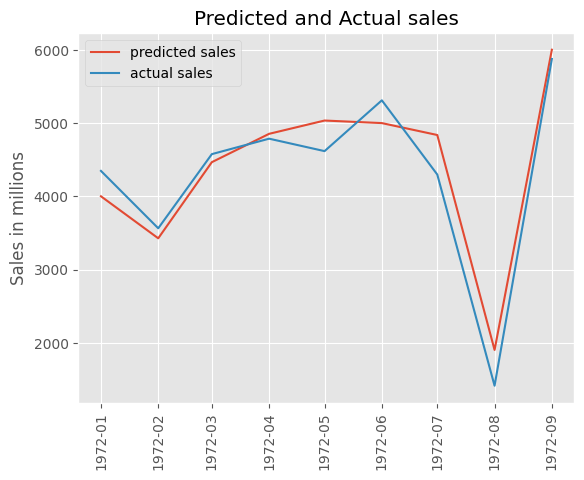

In [ ]:
train_list = list(ts_train)
predictions = []
for index,true_value in ts_test.items():
    model = SARIMAX(train_list, trend='n', order=(0,1,1), seasonal_order=(0,1,1,12))
    results_AR = model.fit(trend = 'nc')
    pred = results_AR.forecast()[0]
    train_list.append(true_value)
    predictions.append(pred)

print ('RMSE: ', mean_squared_error(list(ts_test), predictions) ** 0.5)

pred_series =  pd.Series(predictions, index = ts_test.index)
plt.plot(pred_series, label = 'predicted sales')
plt.plot(ts_test, label = 'actual sales')
plt.xticks(rotation = 'vertical')
plt.ylabel('Sales in millions')
plt.title('Predicted and Actual sales')
plt.legend()
plt.show()

The RMSE is lower than the ARIMA model and the plot also shows that the predicted and actual sales match upto quite an extent.